**MSE plot from Wyoming sounnding data**


In [ ]:
import numpy as np
!pip install siphon
from siphon.simplewebservice.wyoming import WyomingUpperAir
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib

In [ ]:
!pip install --upgrade mseplots_pkg 
!pip install metpy

import metpy
from metpy.calc.thermo import *
from metpy.units import units
import MSEplots
from MSEplots import plots as mpt

Requirement already up-to-date: mseplots_pkg in /usr/local/lib/python3.7/dist-packages (2.5.3)


In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
print("metpy version:",metpy.__version__)
print("MSEplots version:",MSEplots.__version__)
print("matplotlib version",matplotlib.__version__)

metpy version: 1.0
MSEplots version: 2.5.3
matplotlib version 3.2.2


In [ ]:
# read data from Wyoming sounding 
date = datetime(2021, 3, 30, 12)
station = 'MFL'
title = str(date) + ', ' + station 

df = WyomingUpperAir.request_data(date, station)
p = df['pressure'].values #hPa
T = df['temperature'].values  #C
Td = df['dewpoint'].values #C
Z = df['height'].values   #m
u = df['u_wind'].values # m/s
v = df['v_wind'].values # m/s

r = mixing_ratio( saturation_vapor_pressure(Td*units('degC')), p*units('hPa') ) 
q = specific_humidity_from_mixing_ratio(r).magnitude
rs = mixing_ratio( saturation_vapor_pressure(T*units('degC')), p*units('hPa') ) 
qs = specific_humidity_from_mixing_ratio(rs).magnitude

In [ ]:
title

'2021-03-30 12:00:00, MFL'

In [ ]:
df

,pressure,height,temperature,dewpoint,direction,speed,u_wind,v_wind,station,station_number,time,latitude,longitude,elevation,pw
0,1020.0,5,24.6,20.5,90.0,2.0,-2.000000,-1.224647e-16,MFL,72202,2021-03-30 12:00:00,25.75,-80.38,5.0,26.93
1,1019.0,13,24.8,20.0,91.0,2.0,-1.999695,3.490481e-02,MFL,72202,2021-03-30 12:00:00,25.75,-80.38,5.0,26.93
2,1000.0,176,23.8,19.2,115.0,9.0,-8.156770,3.803564e+00,MFL,72202,2021-03-30 12:00:00,25.75,-80.38,5.0,26.93
3,985.3,305,22.7,18.8,115.0,15.0,-13.594617,6.339274e+00,MFL,72202,2021-03-30 12:00:00,25.75,-80.38,5.0,26.93
4,951.3,610,20.0,17.8,120.0,18.0,-15.588457,9.000000e+00,MFL,72202,2021-03-30 12:00:00,25.75,-80.38,5.0,26.93
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,15.1,28346,-41.9,-78.2,90.0,22.0,-22.000000,-1.347111e-15,MFL,72202,2021-03-30 12:00:00,25.75,-80.38,5.0,26.93
95,14.5,28651,-41.9,-78.5,60.0,28.0,-24.248711,-1.400000e+01,MFL,72202,2021-03-30 12:00:00,25.75,-80.38,5.0,26.93
96,13.5,29115,-41.9,-78.9,65.0,31.0,-28.095541,-1.310117e+01,MFL,72202,2021-03-30 12:00:00,25.75,-80.38,5.0,26.93
97,12.6,29566,-38.8,-78.9,70.0,33.0,-31.009856,-1.128666e+01,MFL,72202,2021-03-30 12:00:00,25.75,-80.38,5.0,26.93


In [ ]:
dd = mpt.indices_output(p,T,q,Z)
dd 

,Precipitable_water,Column_relative_humidity,CAPE,CIN,LCL,LFC,EL
0,26.538 millimeter,43.325 dimensionless,726.263 joule / kilogram,31.214 joule / kilogram,957.164 millibar,559.428 millibar,203.579 millibar


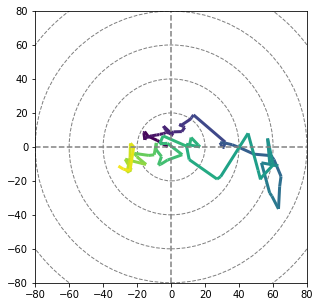

In [ ]:
from metpy.plots import Hodograph

fig, ax_hod = plt.subplots(1,1,figsize=(5,5))
h = Hodograph(ax_hod, component_range=80.)
h.add_grid(increment=20)
h.plot_colormapped(u, v, Z);

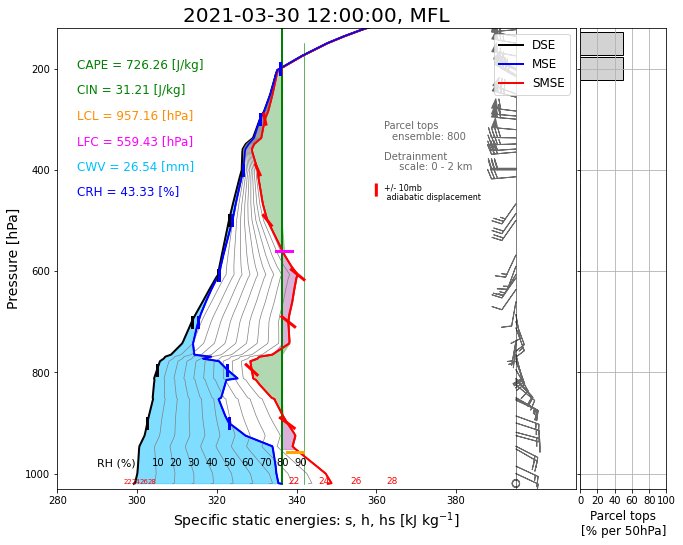

In [ ]:
fig,ax = mpt.msed_plots(p, T ,q , Z, h0_std=2000, ensemble_size=20, ent_rate=np.arange(0,2,0.05), entrain=True)
#mpt.add_curves_Wyoming(ax,datetime(2020,10,8,0),'MFL',linewidth=1.0) # adding sounding data from another day (thin lines)
ax.set_title(title,fontsize=20) # adding figure title
mpt.add_wndbarbs(ax,p,u,v)

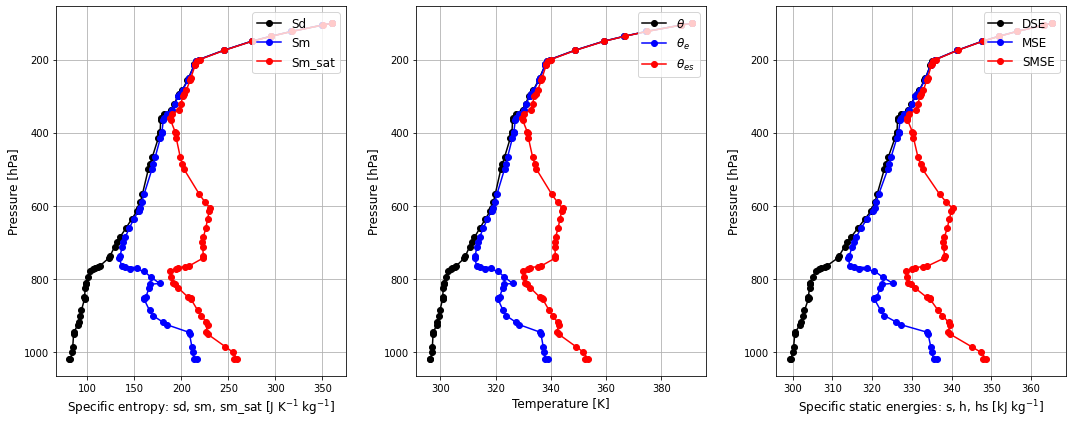

In [ ]:
fig = plt.figure(figsize = (15,6)) 

ax1 = fig.add_subplot(1,3,1)
mpt.entropy_profiles(p,T,q,ax=ax1)
ax2 = fig.add_subplot(1,3,2)
mpt.theta_profiles(p,T,q,ax=ax2)
ax3 = fig.add_subplot(1,3,3)
mpt.mse_profiles(p,T,q,Z,ax=ax3)
plt.tight_layout()